In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-62.686319995889924, -157.96827349849653),
 (-17.953932694583017, 118.24713088947613),
 (-24.26930052679792, 59.80064162791794),
 (-22.208266262460768, 37.981366314732725),
 (-24.623134264411433, 55.55224831316812),
 (16.02755226811091, -138.87777637298288),
 (65.2117738389183, 56.50933381074469),
 (-61.63777294712553, 169.63363586582716),
 (41.20280334670272, -168.58166168602622),
 (-7.894703655416407, 84.78880200741185),
 (46.15273820812567, 68.2439149759611),
 (74.45608072042089, -153.49194613852563),
 (-6.268177231223149, -178.75656809102645),
 (-51.422451905278, 169.90320518059798),
 (26.415036628933734, 34.005635945030065),
 (11.490418004979304, -122.232050086299),
 (-38.92361469442362, -59.13539871492759),
 (51.36054464016195, 77.51984968359619),
 (-89.95870988422946, -50.64353734367634),
 (-88.45869314234841, 153.21545076280472),
 (-9.849917276417713, -10.583678111757962),
 (11.876108117268558, -50.84245018729183),
 (-25.34198218916137, 151.3520676750719),
 (-77.9123421168827

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



545

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
#import requests
#requests.__version__

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
total_record_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        total_record_count += 1 
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(total_record_count)


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | port hedland
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | inhambane
Processing Record 5 of Set 1 | saint-joseph
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | kozhva
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | zhezkazgan
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | safaga
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | necochea
Processing Record 17 of Set 1 | aksu
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | iracoubo
Processing Record 21 of Set 1 | bundaberg
Processing Record 22 of Set 1 | bredasdorp
Processing Record 

Processing Record 37 of Set 4 | ternate
Processing Record 38 of Set 4 | spornoye
Processing Record 39 of Set 4 | san cristobal
Processing Record 40 of Set 4 | mastic
Processing Record 41 of Set 4 | rehoboth
Processing Record 42 of Set 4 | taitung
Processing Record 43 of Set 4 | taikang
Processing Record 44 of Set 4 | waingapu
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | poronaysk
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | sao joao da barra
Processing Record 50 of Set 4 | beloha
Processing Record 1 of Set 5 | campestre
Processing Record 2 of Set 5 | la paz
Processing Record 3 of Set 5 | vila franca do campo
Processing Record 4 of Set 5 | yulara
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | mar del plata
Processing Record 7 of Set 5 | arlit
Processing Record 8 of Set 5 | orumiyeh
Processing Record 9 of Set 5 | sayyan
Processing Record 10 of Set 5 | tuktoyaktuk
Proce

Processing Record 28 of Set 8 | emmendingen
Processing Record 29 of Set 8 | saskylakh
Processing Record 30 of Set 8 | biu
Processing Record 31 of Set 8 | vanavara
Processing Record 32 of Set 8 | kaduna
Processing Record 33 of Set 8 | codrington
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | maldonado
Processing Record 36 of Set 8 | baykit
Processing Record 37 of Set 8 | huazolotitlan
City not found. Skipping...
Processing Record 38 of Set 8 | broken hill
Processing Record 39 of Set 8 | princeton
Processing Record 40 of Set 8 | kedrovyy
Processing Record 41 of Set 8 | bilibino
Processing Record 42 of Set 8 | ahuimanu
Processing Record 43 of Set 8 | fortuna
Processing Record 44 of Set 8 | kahului
Processing Record 45 of Set 8 | bathsheba
Processing Record 46 of Set 8 | abu zabad
Processing Record 47 of Set 8 | pocoes
Processing Record 48 of Set 8 | rafraf
Processing Record 49 of Set 8 | tidore
City not found. Skipping...
Processing Record 50 of Set 8 | boz

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,56.23,91,100,4.92,NZ,2021-11-21 03:44:39
1,Port Hedland,-20.3167,118.5667,93.25,46,99,13.80,AU,2021-11-21 03:44:41
2,Souillac,-20.5167,57.5167,78.37,78,40,9.22,MU,2021-11-21 03:44:41
3,Inhambane,-23.8650,35.3833,73.38,83,40,7.00,MZ,2021-11-21 03:44:41
4,Saint-Joseph,-21.3667,55.6167,80.47,70,19,5.01,RE,2021-11-21 03:44:42
5,Hilo,19.7297,-155.0900,78.53,82,90,6.91,US,2021-11-21 03:32:29
6,Kozhva,65.1073,57.0459,14.45,95,80,6.24,RU,2021-11-21 03:44:42
7,Bluff,-46.6000,168.3333,55.06,88,100,15.10,NZ,2021-11-21 03:44:42
8,Bethel,41.3712,-73.4140,46.76,78,1,0.00,US,2021-11-21 03:39:48
9,Hithadhoo,-0.6000,73.0833,79.86,85,100,16.42,MV,2021-11-21 03:39:47


In [12]:
# Reorder Columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign a new or the same DataFrame with new column order:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-11-21 03:44:39,-46.1927,168.8643,56.23,91,100,4.92
1,Port Hedland,AU,2021-11-21 03:44:41,-20.3167,118.5667,93.25,46,99,13.80
2,Souillac,MU,2021-11-21 03:44:41,-20.5167,57.5167,78.37,78,40,9.22
3,Inhambane,MZ,2021-11-21 03:44:41,-23.8650,35.3833,73.38,83,40,7.00
4,Saint-Joseph,RE,2021-11-21 03:44:42,-21.3667,55.6167,80.47,70,19,5.01
...,...,...,...,...,...,...,...,...,...
491,Havelock,US,2021-11-21 03:57:33,34.8791,-76.9013,49.95,87,66,6.80
492,Uthal,PK,2021-11-21 03:57:33,25.8072,66.6219,76.23,15,0,6.46
493,Meulaboh,ID,2021-11-21 03:57:34,4.1363,96.1285,75.45,94,100,5.06
494,Lenart,SI,2021-11-21 03:57:34,46.5761,15.8313,45.09,83,90,0.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Start of Plotting

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

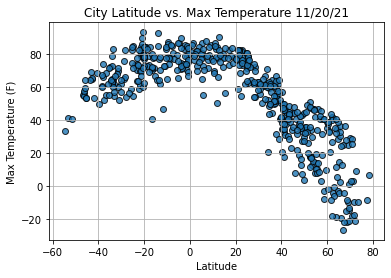

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")



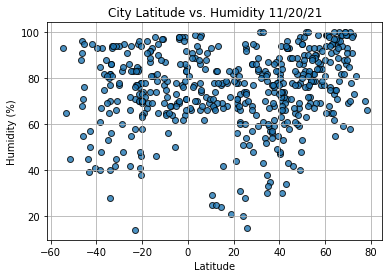

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

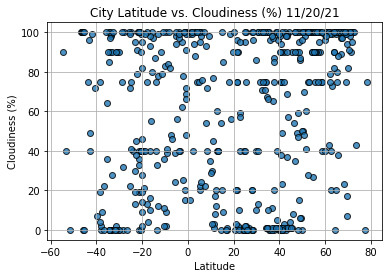

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

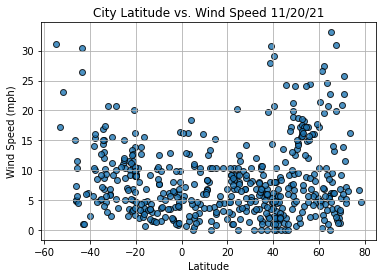

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()